### My first pytti art! - maybe...?

Next, we'll author a config *.yaml file containing the settings that describe the experiment we want to run.

The file needs to go in the `config/conf` subdirectory and can be named whatever we want. 

Under the current config system, the *first line* of the file needs to be: `# @package _global_`

After that, each setting goes on its own line. The order in which they appear does not matter, as long as each setting appears on a line of its own. It's also ok to separate entries with white space and you can even add comments by starting the line with a `#` symbol.

We'll start by specifying a text prompt and see what happens. We'll also specify a random seed as well, just to ensure the outputs are deterministic. This helps us understand exactly how changing a setting modifies the generated image.

In [1]:
%%writefile config/conf/my_first_pytti_art.yaml
# @package _global_
scenes: The swirling cloud of the wormhole is a metaphor for the inner workings of the mind.
seed: 123

Overwriting config/conf/my_first_pytti_art.yaml


Next, we'll pass this config file to the CLI to generate an image using the `conf` argument. Note that the name of this argument is actually the name of the subfolder the file is in. See the "Usage" article for details on precisely what's going on here.

We just need to provide the CLI the name of the file without the `*.yaml` file extension.

In [2]:
%%capture
!python -m pytti.workhorse conf=my_first_pytti_art
# this takes 48s on an RTX 3090

We now have an `images_out/` subdirectory (if one didn't already exist). Among the log messages above, we can see a collection of settings. The `scenes` argument we provided is among them, the rest came from `config/default.yaml`. The filename we provided to the `conf=` argument above specified the parameters we wanted to *override* relative to the default parameters. If we don't specify a parameter, the default gets used. If we forget to add `# @package _global_` to the top of the file, the overrides we want won't take effect and only default values will be passed to the PyTTI "workhorse" renderer.

The `file_namespace` parameter determines where our generated images go and what they will be named. Because we didn't specify otherwise, our experiment ran with `file_namespace: default`. This means our images will appear in a folder named `images_out/default`. Let's see what's in there:

In [3]:
ls images_out/default

'default(1)_1.png'  'default(1)_settings.txt'   default_2.png
'default(1)_2.png'  'default(2)_1.png'         'default(2)_settings.txt'
 default_1.png      'default(2)_2.png'          default_settings.txt


Our run generated two images because the default behavior is to save every 50 steps and run for a total of 100 steps. Let's take a look at our 100 step result.

foobar


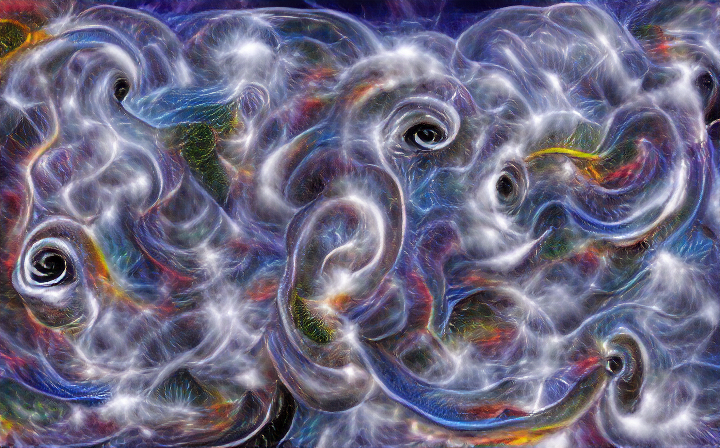

In [4]:
print("foobar")
from IPython.display import Image

path_to_image = "images_out/default/default_2.png"
Image(path_to_image)